### reading the necessary libraries and the dataset, and descovering the data info

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sms
import statsmodels as sm
from scipy import stats
from scipy.stats import ttest_ind

In [6]:
df=pd.read_csv('WA_Marketing-Campaign.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [7]:
df.shape

(548, 7)

In [8]:
print(df.Promotion.unique())
print(df.MarketSize.unique())
print(df.week.unique())

[3 2 1]
['Medium' 'Small' 'Large']
[1 2 3 4]


In [9]:
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

no null values in our data

### conducting ab test and multiple linear regression on the three promotions

In [10]:
print(len(df.query('Promotion==1'))/len(df))
print(len(df.query('Promotion==2'))/len(df))
print(len(df.query('Promotion==3'))/len(df))

0.31386861313868614
0.34306569343065696
0.34306569343065696


In [11]:
promotion_1 = df[df["Promotion"] == 1]
promotion_2 = df[df["Promotion"] == 2]
promotion_3 = df[df["Promotion"] == 3]

1st null: promotion 1 is equal to other promotions

2nd null: promotion 1 is equal to or better than other promotions

1st alternative: there is a difference between promotion 1 and the other promotion

2nd alternative: the other promotion is better than promotion 1

we first see if there is a difference between the promotions then if one is better

In [12]:
# 1 & 2
print(ttest_ind(promotion_1["SalesInThousands"], promotion_2["SalesInThousands"],alternative='two-sided'))
print(ttest_ind(promotion_1["SalesInThousands"], promotion_2["SalesInThousands"],alternative='less'))

Ttest_indResult(statistic=6.453671702181005, pvalue=3.5506696512134566e-10)
Ttest_indResult(statistic=6.453671702181005, pvalue=0.9999999998224665)


we regect the 1st null which means that there is a difference between promotion 1 and 2
but we fail to regect the 2nd null which means promotion 1 outperforms promotion 2.

In [13]:
# 1 & 3
print(ttest_ind(promotion_1["SalesInThousands"], promotion_3["SalesInThousands"],alternative='two-sided'))
print(ttest_ind(promotion_1["SalesInThousands"], promotion_3["SalesInThousands"],alternative='less'))

Ttest_indResult(statistic=1.5551383687293547, pvalue=0.12079667272313277)
Ttest_indResult(statistic=1.5551383687293547, pvalue=0.9396016636384337)


we fail to regect both the nulls which means that there is no statistical sagnficance between the 1st and 3rd promotion which means the firm can keep either of them

just to make sure we compare 2 & 3 the 3rd promotion should outperform the 2nd

In [14]:
# 2 & 3
print(ttest_ind(promotion_3["SalesInThousands"], promotion_2["SalesInThousands"],alternative='two-sided'))
print(ttest_ind(promotion_3["SalesInThousands"], promotion_2["SalesInThousands"],alternative='less'))

Ttest_indResult(statistic=4.88139271089348, pvalue=1.5628943036277377e-06)
Ttest_indResult(statistic=4.88139271089348, pvalue=0.9999992185528481)


just as we expected we regect the 1st null which means there is a difference between the 3rd and 2nd promotion and we fail to regect the 2nd which means that promotion 3 is better than the 2nd promotion

conclusion: the 1st and 3rd promotions aren't statisticaly different and they both out perform the 2nd promotion the company should use either of them

In [15]:
df['intercept']=1
df[['a','b','c']]=pd.get_dummies(df['Promotion'])
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,intercept,a,b,c
0,1,Medium,1,4,3,1,33.73,1,0,0,1
1,1,Medium,1,4,3,2,35.67,1,0,0,1
2,1,Medium,1,4,3,3,29.03,1,0,0,1
3,1,Medium,1,4,3,4,39.25,1,0,0,1
4,1,Medium,2,5,2,1,27.81,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34,1,1,0,0
544,10,Large,920,14,2,1,50.20,1,0,1,0
545,10,Large,920,14,2,2,45.75,1,0,1,0
546,10,Large,920,14,2,3,44.29,1,0,1,0


In [16]:
lm=sms.OLS(df['SalesInThousands'],df[['intercept','b','c']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalesInThousands   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     21.95
Date:                Thu, 12 May 2022   Prob (F-statistic):           6.77e-10
Time:                        21:10:30   Log-Likelihood:                -2300.5
No. Observations:                 548   AIC:                             4607.
Df Residuals:                     545   BIC:                             4620.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     58.0990      1.231     47.186      0.000      55.680      60.518
b            -10.7696      1.704     -6.321      0.000     -14.116      -7.423
c             -2.7345      1.704     -1.605      0.109      -6.081       0.612
==============================================================================
Omnibus:                       52.072   Durbin-Watson:                   0.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.242
Skew:                           0.842   Prob(JB):                     6.81e-15
Kurtosis:                       3.137   Cond. No.                         3.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we regect the null hypothesis in b which means that it's statistically sagnificant and the 2nd promotion is going to give us less sales by 10.7 than promotions 1 and 3

<AxesSubplot:xlabel='Promotion', ylabel='SalesInThousands'>

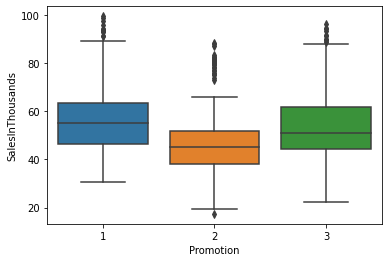

In [44]:
sns.boxplot(data=df, x='Promotion', y='SalesInThousands')

### conducting ab test and multiple linear regression on the three market sizes

In [ ]:
size_l = df[df["MarketSize"] == 'Large']
size_m = df[df["MarketSize"] == 'Medium']
size_s = df[df["MarketSize"] == 'Small']

In [ ]:
# l & m
print(ttest_ind(size_l["SalesInThousands"], size_m["SalesInThousands"],alternative='two-sided'))
print(ttest_ind(size_l["SalesInThousands"], size_m["SalesInThousands"],alternative='less'))

Ttest_indResult(statistic=22.123613884826185, pvalue=1.52264148713277e-75)
Ttest_indResult(statistic=22.123613884826185, pvalue=1.0)


In [ ]:
# l & s
print(ttest_ind(size_l["SalesInThousands"], size_s["SalesInThousands"],alternative='two-sided'))
print(ttest_ind(size_l["SalesInThousands"], size_s["SalesInThousands"],alternative='less'))

Ttest_indResult(statistic=5.616004515174995, pvalue=5.709209712779958e-08)
Ttest_indResult(statistic=5.616004515174995, pvalue=0.9999999714539515)


In [ ]:
# s & m
print(ttest_ind(size_s["SalesInThousands"], size_m["SalesInThousands"],alternative='two-sided'))
print(ttest_ind(size_s["SalesInThousands"], size_m["SalesInThousands"],alternative='less'))

Ttest_indResult(statistic=10.944927972586655, pvalue=2.102173527805072e-24)
Ttest_indResult(statistic=10.944927972586655, pvalue=1.0)


Large is the best, then small and the last one is medium

In [ ]:
df['intercept']=1
df[['l','m','s']]=pd.get_dummies(df['MarketSize'])
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,intercept,a,b,c,l,m,s
0,1,Medium,1,4,3,1,33.73,1,0,0,1,0,1,0
1,1,Medium,1,4,3,2,35.67,1,0,0,1,0,1,0
2,1,Medium,1,4,3,3,29.03,1,0,0,1,0,1,0
3,1,Medium,1,4,3,4,39.25,1,0,0,1,0,1,0
4,1,Medium,2,5,2,1,27.81,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34,1,1,0,0,1,0,0
544,10,Large,920,14,2,1,50.20,1,0,1,0,1,0,0
545,10,Large,920,14,2,2,45.75,1,0,1,0,1,0,0
546,10,Large,920,14,2,3,44.29,1,0,1,0,1,0,0


In [ ]:
lm=sms.OLS(df['SalesInThousands'],df[['intercept','m','s']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalesInThousands   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     268.9
Date:                Thu, 12 May 2022   Prob (F-statistic):           5.63e-82
Time:                        20:40:02   Log-Likelihood:                -2133.6
No. Observations:                 548   AIC:                             4273.
Df Residuals:                     545   BIC:                             4286.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     70.1167      0.919     76.315      0.000      68.312      71.922
m            -26.1314      1.135    -23.031      0.000     -28.360     -23.903
s            -12.7074      1.791     -7.095      0.000     -16.226      -9.189
==============================================================================
Omnibus:                        8.158   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                6.384
Skew:                          -0.166   Prob(JB):                       0.0411
Kurtosis:                       2.588   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

large market is the best then small then medium

<AxesSubplot:xlabel='MarketSize', ylabel='SalesInThousands'>

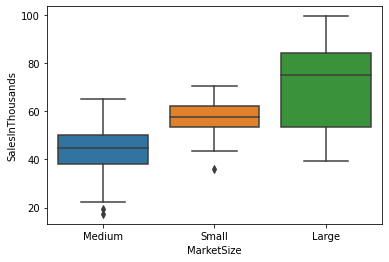

In [45]:
sns.boxplot(data=df, x='MarketSize', y='SalesInThousands')

### conducting ab test and multiple linear regression on the 4 weeks

In [ ]:
week_1 = df[df["week"] == 1]
week_2 = df[df["week"] == 2]
week_3 = df[df["week"] == 3]
week_4 = df[df["week"] == 4]

In [ ]:
# 1 & 2
print(ttest_ind(week_1["SalesInThousands"], week_2["SalesInThousands"],alternative='two-sided'))
print(ttest_ind(week_1["SalesInThousands"], week_2["SalesInThousands"],alternative='less'))

Ttest_indResult(statistic=0.20203327748266553, pvalue=0.8400417303930974)
Ttest_indResult(statistic=0.20203327748266553, pvalue=0.5799791348034513)


In [ ]:
# 1 & 3
print(ttest_ind(week_1["SalesInThousands"], week_3["SalesInThousands"],alternative='two-sided'))
print(ttest_ind(week_1["SalesInThousands"], week_3["SalesInThousands"],alternative='less'))

Ttest_indResult(statistic=0.15376989522148996, pvalue=0.8779051949070988)
Ttest_indResult(statistic=0.15376989522148996, pvalue=0.5610474025464507)


In [ ]:
# 1 & 4
print(ttest_ind(week_1["SalesInThousands"], week_4["SalesInThousands"],alternative='two-sided'))
print(ttest_ind(week_1["SalesInThousands"], week_4["SalesInThousands"],alternative='less'))

Ttest_indResult(statistic=0.2810415910671746, pvalue=0.7788921645083894)
Ttest_indResult(statistic=0.2810415910671746, pvalue=0.6105539177458054)


all the weeks are equal

In [ ]:
df['intercept']=1
df[['w1','w2','w3','w4']]=pd.get_dummies(df['week'])
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,intercept,a,b,c,l,m,s,w1,w2,w3,w4
0,1,Medium,1,4,3,1,33.73,1,0,0,1,0,1,0,1,0,0,0
1,1,Medium,1,4,3,2,35.67,1,0,0,1,0,1,0,0,1,0,0
2,1,Medium,1,4,3,3,29.03,1,0,0,1,0,1,0,0,0,1,0
3,1,Medium,1,4,3,4,39.25,1,0,0,1,0,1,0,0,0,0,1
4,1,Medium,2,5,2,1,27.81,1,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34,1,1,0,0,1,0,0,0,0,0,1
544,10,Large,920,14,2,1,50.20,1,0,1,0,1,0,0,1,0,0,0
545,10,Large,920,14,2,2,45.75,1,0,1,0,1,0,0,0,1,0,0
546,10,Large,920,14,2,3,44.29,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
lm=sms.OLS(df['SalesInThousands'],df[['intercept','w2','w3','w4']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalesInThousands   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.02843
Date:                Thu, 12 May 2022   Prob (F-statistic):              0.994
Time:                        20:40:03   Log-Likelihood:                -2321.7
No. Observations:                 548   AIC:                             4651.
Df Residuals:                     544   BIC:                             4669.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     53.7906      1.435     37.476      0.000      50.971      56.610
w2            -0.4040      2.030     -0.199      0.842      -4.391       3.583
w3            -0.3160      2.030     -0.156      0.876      -4.303       3.671
w4            -0.5775      2.030     -0.285      0.776      -4.565       3.410
==============================================================================
Omnibus:                       48.418   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.549
Skew:                           0.804   Prob(JB):                     1.17e-13
Kurtosis:                       3.145   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

all the weeks are the same

<AxesSubplot:xlabel='week', ylabel='SalesInThousands'>

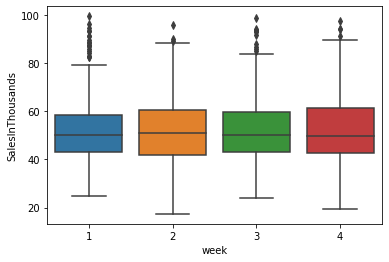

In [46]:
sns.boxplot(data=df, x='week', y='SalesInThousands')

## Conclusions
- the 1st and the 3rd promotion are likely to perform better than the 2nd promotion so the company should rely on them.
- the large size market is the best then the small market and lastly the medium size.
- the sales are almost the same in all the weeks.